<a href="https://colab.research.google.com/github/sidhunt/ML-implementations/blob/main/Assign_5_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning Resnet on CIFAR10 by Siddhant Badola.

In [ ]:
import tensorflow as tf
from tensorflow import keras as k
from keras.utils import np_utils,to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train,Y_train),(x_test,Y_test)= k.datasets.cifar10.load_data()

In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


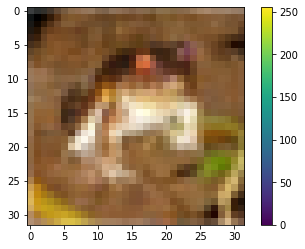

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(Y_train[0])

[6]


In [ ]:
print(Y_train.shape)

(50000, 1)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1,  
    #zoom_range=0.3,
    )
datagen.fit(x_train)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

In [ ]:
# x_train=x_train/255.0
# x_test=x_test/255.0
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)
# mean=np.mean(x_train,axis=0)
# x_train-=mean
# x_test-=mean
x_train/=255.0
x_test/=255.0

In [ ]:
print(y_train.shape)

(50000, 10)


In [ ]:
def scheduler(epoch,lr):
  if epoch<5:
    return 0.01
  elif epoch<10:
    return 0.001
  elif epoch<15:
    return lr*0.0001
  elif epoch<20:
    return lr*0.00001

In [ ]:
mod=k.Sequential()
model1=k.applications.ResNet50(include_top=False,classes=10,pooling='max',weights="imagenet",input_shape=(32,32,3))
mod.add(model1)
mod.add(k.layers.Dense(10, activation='softmax'))

schedule=k.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=100000,decay_rate=0.95,staircase=True,)   
sgd=k.optimizers.SGD(learning_rate=schedule)
mod.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,))      

In [ ]:
mod.summary()
print(len(mod.layers))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________
2


In [ ]:
history=mod.fit(x_train,y_train, epochs=15,steps_per_epoch=200,validation_data=(x_test,y_test),verbose=1,batch_size=128,use_multiprocessing=True,) 
loss,acc=mod.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/15
200/200 [==============================] - 11s 57ms/step - loss: 1.6130 - accuracy: 0.4835 - val_loss: 3.4237 - val_accuracy: 0.1086
Epoch 2/15
200/200 [==============================] - 11s 53ms/step - loss: 1.0010 - accuracy: 0.6592 - val_loss: 3.9730 - val_accuracy: 0.1160
Epoch 3/15
200/200 [==============================] - 11s 53ms/step - loss: 0.7094 - accuracy: 0.7565 - val_loss: 3.6137 - val_accuracy: 0.1469
Epoch 4/15
200/200 [==============================] - 11s 53ms/step - loss: 0.6556 - accuracy: 0.7756 - val_loss: 2.3572 - val_accuracy: 0.3345
Epoch 5/15
200/200 [==============================] - 11s 53ms/step - loss: 0.4556 - accuracy: 0.8436 - val_loss: 1.0684 - val_accuracy: 0.6568
Epoch 6/15
200/200 [==============================] - 11s 53ms/step - loss: 0.4491 - accuracy: 0.8463 - val_loss: 0.8137 - val_accuracy: 0.7335
Epoch 7/15
200/200 [==============================] - 11s 53ms/step - loss: 0.2959 - accuracy: 0.9025 - val_loss: 0.7936 - val_accuracy:

In [ ]:
history=mod.fit_generator(datagen.flow(x_train,y_train,batch_size=64), epochs=90,steps_per_epoch=200,validation_data=(x_test,y_test),verbose=1,) 
loss,acc=mod.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/90
200/200 [==============================] - 12s 59ms/step - loss: 0.8517 - accuracy: 0.7198 - val_loss: 1.0564 - val_accuracy: 0.6930
Epoch 2/90
200/200 [==============================] - 12s 59ms/step - loss: 0.7823 - accuracy: 0.7387 - val_loss: 0.9964 - val_accuracy: 0.7081
Epoch 3/90
200/200 [==============================] - 12s 59ms/step - loss: 0.7513 - accuracy: 0.7452 - val_loss: 0.9264 - val_accuracy: 0.7114
Epoch 4/90
200/200 [==============================] - 12s 59ms/step - loss: 0.7178 - accuracy: 0.7566 - val_loss: 0.9029 - val_accuracy: 0.7026
Epoch 5/90
200/200 [==============================] - 12s 58ms/step - loss: 0.6863 - accuracy: 0.7636 - val_loss: 0.9836 - val_accuracy: 0.7101
Epoch 6/90
200/200 [==============================] - 12s 59ms/step - loss: 0.6474 - accuracy: 0.7755 - val_loss: 0.7336 - val_accuracy: 0.7694
Epoch 7/90
200/200 [==============================] - 12s 59ms/step - loss: 0.6139 - accuracy: 0.7937 - val_loss: 0.7111 - val_accuracy:

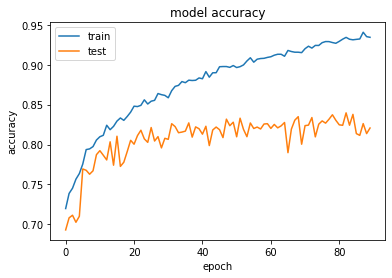

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history2=mod.fit_generator(datagen.flow(x_train,y_train,batch_size=64), epochs=50,steps_per_epoch=200,validation_data=(x_test,y_test),verbose=1,) # validation_data=(x_test, y_test,),verbose=1) #validation_split=0.1,
loss,acc2=mod.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc2)

Epoch 1/50
200/200 [==============================] - 12s 62ms/step - loss: 0.1911 - accuracy: 0.9328 - val_loss: 0.6047 - val_accuracy: 0.8272
Epoch 2/50
200/200 [==============================] - 12s 62ms/step - loss: 0.1854 - accuracy: 0.9364 - val_loss: 0.6477 - val_accuracy: 0.8229
Epoch 3/50
200/200 [==============================] - 12s 62ms/step - loss: 0.1744 - accuracy: 0.9389 - val_loss: 0.7321 - val_accuracy: 0.8059
Epoch 4/50
200/200 [==============================] - 12s 62ms/step - loss: 0.1791 - accuracy: 0.9368 - val_loss: 0.5934 - val_accuracy: 0.8342
Epoch 5/50
200/200 [==============================] - 12s 62ms/step - loss: 0.1704 - accuracy: 0.9402 - val_loss: 0.6577 - val_accuracy: 0.8195
Epoch 6/50
200/200 [==============================] - 12s 62ms/step - loss: 0.1775 - accuracy: 0.9376 - val_loss: 0.6436 - val_accuracy: 0.8221
Epoch 7/50
200/200 [==============================] - 12s 61ms/step - loss: 0.1682 - accuracy: 0.9416 - val_loss: 0.6272 - val_accuracy:

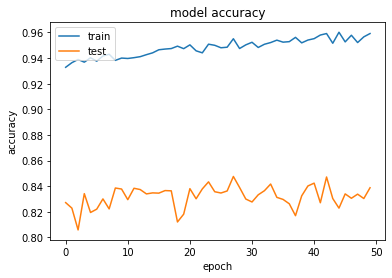

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history3=mod.fit_generator(datagen.flow(x_train,y_train,batch_size=64), epochs=50,steps_per_epoch=200,validation_data=(x_test,y_test),verbose=1,) # validation_data=(x_test, y_test,),verbose=1) #validation_split=0.1,
loss,acc3=mod.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc2)

Epoch 1/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0823 - accuracy: 0.9714 - val_loss: 0.6274 - val_accuracy: 0.8467
Epoch 2/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0870 - accuracy: 0.9685 - val_loss: 0.7396 - val_accuracy: 0.8237
Epoch 3/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0869 - accuracy: 0.9704 - val_loss: 0.8026 - val_accuracy: 0.8170
Epoch 4/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0866 - accuracy: 0.9695 - val_loss: 0.7504 - val_accuracy: 0.8245
Epoch 5/50
200/200 [==============================] - 12s 58ms/step - loss: 0.0722 - accuracy: 0.9767 - val_loss: 0.6970 - val_accuracy: 0.8367
Epoch 6/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0768 - accuracy: 0.9737 - val_loss: 0.6817 - val_accuracy: 0.8366
Epoch 7/50
200/200 [==============================] - 12s 59ms/step - loss: 0.0796 - accuracy: 0.9727 - val_loss: 0.6764 - val_accuracy:

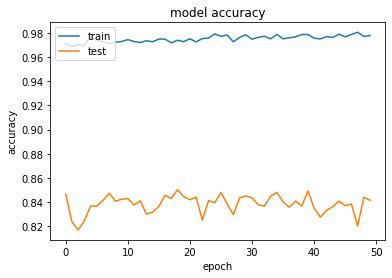

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Average=(acc+acc2+acc3)/3.0
print("Average accuracy= ",Average)

Average accuracy=  0.8333333333333334
